# Movie profitability over the years
Tracking the success of movies across multiple genres from the mid 1800's to 2017, as determined by net revenue.

In [5]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataset retrieved from https://www.kaggle.com/rounakbanik/the-movies-dataset
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


We then grab the relevant columns: genre, release date, and revenue. The title of each movie is just thrown in there for fun.

In [2]:
data = df[["genres", "original_title", "release_date", "revenue"]]
data.head()

,genres,original_title,release_date,revenue
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,1995-10-30,373554033.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,1995-12-15,262797249.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,1995-12-22,0.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,1995-12-22,81452156.0
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,1995-02-10,76578911.0


Here, the above data is placed into a nested dictionary structure. The keys to the dictionary are the genres of the movies; the cooresponding values are dictionaries containing the year as the key, and total revenue for movies belonging to that genre during that year as the value.

In [3]:
full_collection = {}
for row in range(len(df)):
    stryear = str(data.iloc[row]["release_date"])[:4] #retrieve the year when the film was released
    if stryear == 'nan' or int(stryear) < 1800 or int(stryear) > 2017:
        continue
    year = int(stryear) #convert to integer so iteration becomes easier
    
    for genre in ast.literal_eval(data.iloc[row]['genres']): #add net revenue to totals for each genre
        if genre['name'] not in full_collection:
            full_collection[genre['name']] = {}
        if year not in full_collection[genre['name']]:
            full_collection[genre['name']][year] = float(data.iloc[row]["revenue"])
        else:
            full_collection[genre['name']][year] += float(data.iloc[row]["revenue"])

We then plot the data to visualize the revenue that each movie genre took in over time.

<function matplotlib.pyplot.show(*args, **kw)>

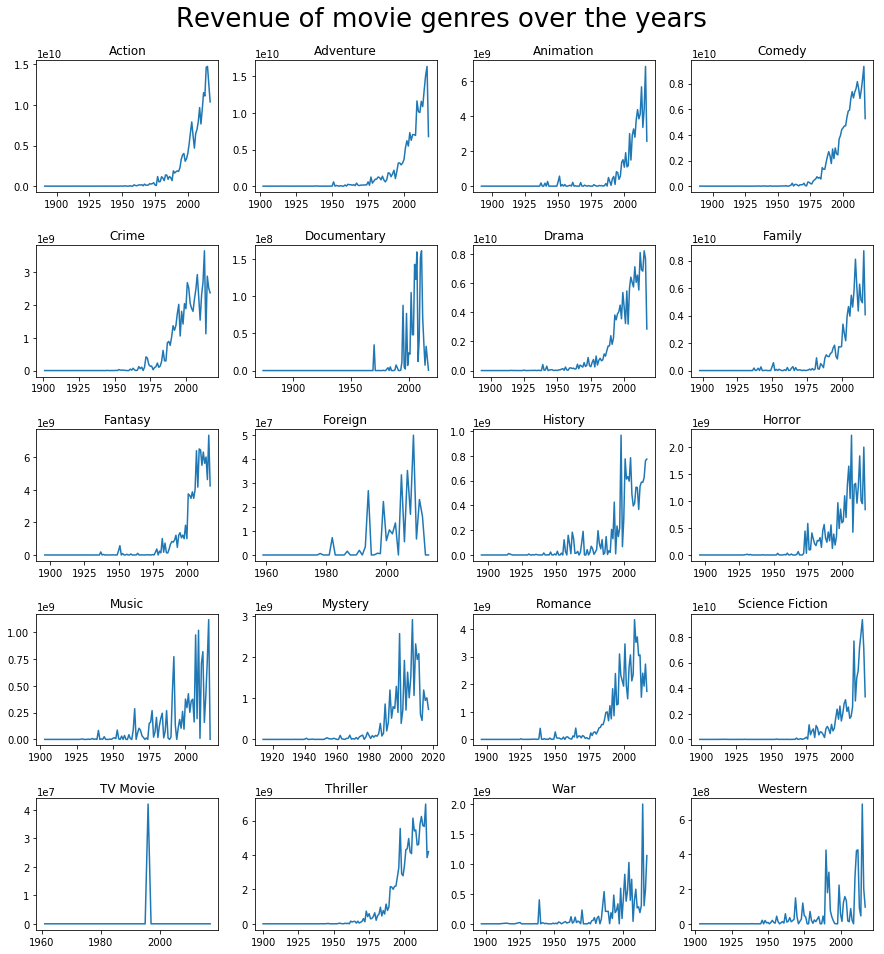

In [4]:
index = 1
fig = plt.figure(figsize=(15,15))
for genre in sorted(full_collection.keys()):
    lists = sorted(full_collection[genre].items())
    x,y = zip(*lists)
    #plt.figure(figsize)
    plt.subplot(5,4,index)
    plt.title(genre)
    plt.plot(x,y)
    index += 1
plt.subplots_adjust(top=0.93, hspace=0.4) #add space between rows
fig.suptitle("Revenue of movie genres over the years", fontsize=26)
plt.show

In [ ]:
index = 1
fig = plt.figure(figsize=(15,15))
for genre in sorted(full_collection.keys()):
    lists = sorted(full_collection[genre].items())
    x,y = zip(*lists)
    #plt.figure(figsize)
    plt.subplot(5,4,index)
    plt.title(genre)
    plt.plot(x,y)
    index += 1
plt.subplots_adjust(top=0.93, hspace=0.4) #add space between rows
fig.suptitle("Revenue of movie genres over the years", fontsize=26)
plt.show